##**TASK 1 : Code to find Super Winner on a Network**
###Database Followed ->   Modified Network Dataset.xlsx

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Modified Network Dataset.xlsx")

In [2]:
# Count total number of elements in column 'Roll Number' to get unique ids
total_students = df['Roll Number'].count()

In [3]:
# Generate nodes from 0 to (total_students - 1)
nodes = range(total_students)

# Create a directed Graph graph
G = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

In [4]:
# Map roll numbers to nodes
node_roll_number_map = {node : roll_number for node, roll_number in zip(nodes,df['Roll Number'])}


# Create edges
for node, roll_number in node_roll_number_map.items():
    # Get the row index of the DataFrame corresponding to the roll number -> node ~ index
    # Iterate through columns (excluding 'Name' & 'Roll Number')
    for col in df.columns[2:]:
      # Get the roll numbers from the column
      connected_roll_number = df.loc[node, col]
      # Get the node corresponding to the connected roll number
      for connected_node, rn in node_roll_number_map.items():
          if rn == connected_roll_number:
              # Add an edge between the nodes
              G.add_edge(node, connected_node)

In [5]:
def random_walk(graph):
    nodes = list(graph.nodes())
    num_nodes = len(nodes)
    points = [0 for _ in range(num_nodes)]  # Initialize points with zeros
    current_node = random.choice(nodes)
    points[current_node] += 1  # Increment the count for the starting node

    iterations = 0
    while iterations != 100000:
        out_edges = list(graph.out_edges(current_node))  # Get the out edges of the current node
        if len(out_edges) == 0:
            next_node = random.choice(nodes)
        else:
            random_edge = list(random.choice(out_edges))  # Randomly select an out edge
            next_node = random_edge[1]  # Get the target node of the selected edge
        points[next_node] += 1  # Increment the count for the next node
        current_node = next_node  # Update the current node for the next iteration
        iterations += 1

    return points

In [6]:
# Perform Random Walk
Points = random_walk(G)

#Winner Declaration
winner = Points.index(max(Points))
print("The Super Winner is ", node_roll_number_map[winner])
winner_row = df[df['Roll Number'] == node_roll_number_map[winner]]
winner_name = df.loc[df['Roll Number'] == node_roll_number_map[winner], 'Name'].iloc[0]
print("The Super Winner's name is ", winner_name)

node = winner
in_degree = G.in_degree(node)
print("In-degree of node {}: {}".format(winner_name, in_degree))


The Super Winner is  2023MCB1316
The Super Winner's name is  UDISH ARORA
In-degree of node UDISH ARORA: 41


##Final Result (From The Given Static Data)


---


###The Super Winner is  2023CSB1091
###The Super Winner's name is  AADIT MAHAJAN
###In-degree of node AADIT MAHAJAN: 44

##Run the below code to get GRAPH on the given data.


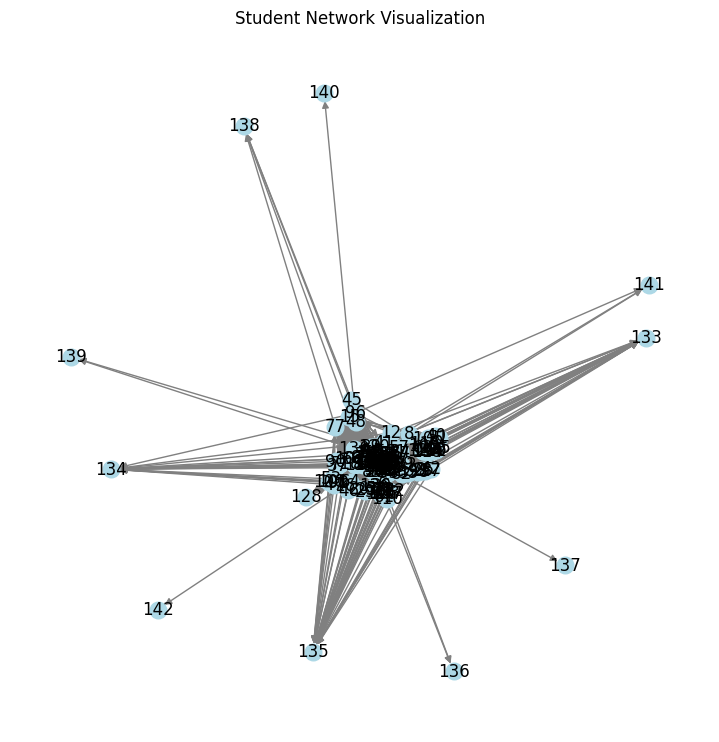

In [7]:
import matplotlib.pyplot as plt

# Visualize the network
plt.figure(figsize=(7, 7))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=143, edge_color='gray')
plt.title("Student Network Visualization")
plt.show()